# DIY Industry Plant: Can We Use AI to Become the Next HouseHold Name?


## Overview

In this project, we focus on a dataset conisting of multiple songs imported from Spotify, which include their audio features (danceability, key signature, energy, loudness, etc.) as well as their track popularity. We want to see if there were any linear correlations with certain audio features and the popularity of the track. We created a correlation matrix (shown below) and recorded all the correlation coefficients, and saw there was not a high linear correlation with most audio features. We concluded that there might be other non-linear correlations with track popularity and the audio features we tested, or we might just need to look into other machine learning techniques. 



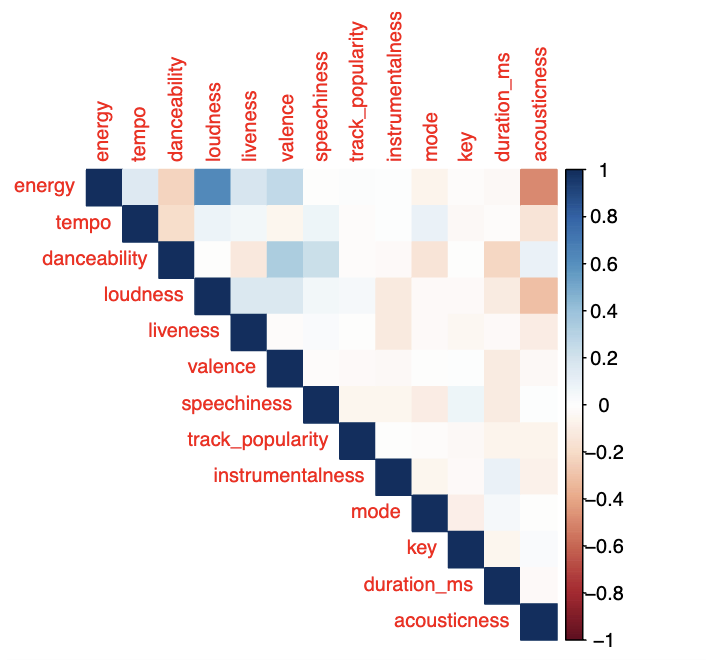

In [ ]:
from IPython.display import Image
Image(filename="corrlation.png", width=350)


With that, we decided to look into the K-means clustering technique for this project. K-means clustering is a machine learning technique that will partition data points into different clusters depending on a similar mean value of those points. Basically, the algorithm calculates a "k" number of means and will cluster data points based on those points. 

## Importing Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [ ]:
# load dataset
spotify = pd.read_csv("high_popularity_spotify_data.csv")

# get rid of duplicate rows if there
spotify = spotify.drop_duplicates()
spotify.head()


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


We have imported the dataset, along with specific libraries to help visualize our data and create the k-means clustering. We have also gotten rid of duplicate data values that might have popped up in the dataset. The dataset did not have any missing values either. In the previous project, we removed outliers just to make the linear regression model more accurate and not be skewed by data that would make the lines of best fit much wider than necessary. Since we are not using linear regression necessarily and are grouping by means, we do not need to remove outliers since those extreme values would most likely be grouped together. 

## Selecting Audio Features

In [ ]:
# relevant audio features
features = spotify[["danceability", "energy", "loudness", "valence", "tempo", "speechiness", "acousticness", "duration_ms"]]

spotify[["danceability", "energy", "loudness", "valence", "tempo", "speechiness", "acousticness", "duration_ms"]].head()

,danceability,energy,loudness,valence,tempo,speechiness,acousticness,duration_ms
0,0.521,0.592,-7.777,0.535,157.969,0.0304,0.3080,251668
1,0.747,0.507,-10.171,0.438,104.978,0.0358,0.2000,210373
2,0.554,0.808,-4.169,0.372,108.548,0.0368,0.2140,166300
3,0.670,0.910,-4.070,0.786,112.966,0.0634,0.0939,157280
4,0.777,0.783,-4.477,0.939,149.027,0.2600,0.0283,169917


Here we have chosen some audio features that could determine track popularity. Some were based off of the correlation matrix from the previous project, while other variables (danceability, energy, loudness, valence, tempo) were picked just to see if those factors would have an impact on track popularity. We will also do some feature scaling just to make sure there is no calclated bias. 

In [ ]:
# scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Data Visualization 

Now we will start creating our k-means clusters. We are able to pick any amount of clusters that we would like, but since we have 8 different features we want to look at, we have decided to get 8 clusters of data. 

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42)
spotify["cluster"] = kmeans.fit_predict(scaled_features)


First, we want to plot some basic features of the dataset, just to get a better visual of the data we are looking into. 

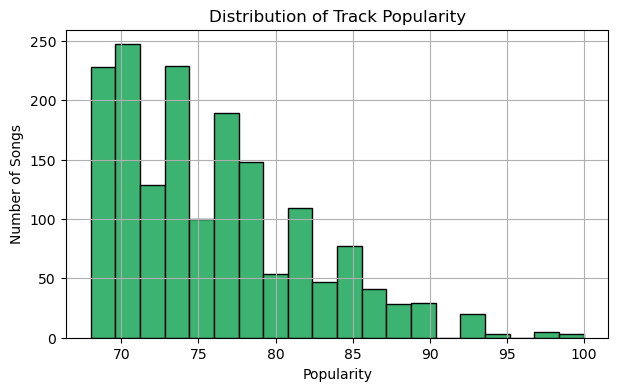

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(spotify["track_popularity"], bins=20, color="mediumseagreen", edgecolor="black")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()


This graph shows that most songs in the dataset typically have around a 65-80% popularity, with very few songs being 100% popular. The data is pretty realistic to how most people listen to music; they enjoy some songs from top charts but also some lesser-known music as well. 


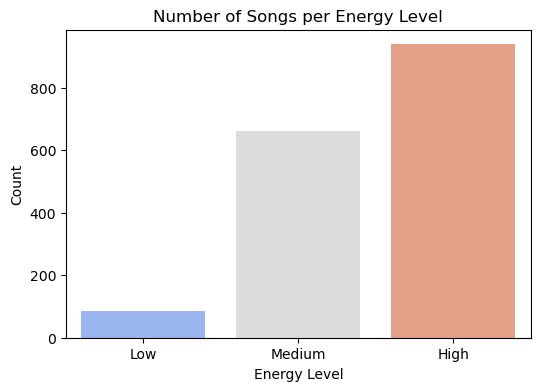

In [ ]:

#energy level column
spotify["energy_level"] = pd.cut(spotify["energy"], bins=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 4))
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
sns.countplot(data=spotify, x="energy_level", palette="coolwarm")
plt.title("Number of Songs per Energy Level")
plt.xlabel("Energy Level")
plt.ylabel("Count")
plt.show()

With our data, we also looked at grouping songs in the dataset based on energy level. Each bin was equally partitioned from low (0-0.333), medium (0.334-0.667), and high (0.668-1.0). The model shows that most songs in the dataset have a medium and high energy level rather than low. The songs we are looking at in the dataset typically are not more mellow and slow songs but a bit more upbeat. 

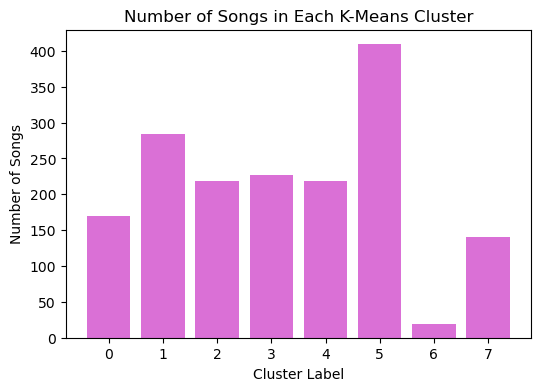

In [ ]:
# graph showing the number of songs in each cluster

cluster_counts = spotify["cluster"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(cluster_counts.index, cluster_counts.values, color="orchid")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Songs")
plt.title("Number of Songs in Each K-Means Cluster")
plt.xticks(cluster_counts.index)
plt.show()


We also wanted a graph to visualize the k-means itself. Since there were 8 clusters due to the 8 variables, we wanted to see how many songs were shown in each cluster. The graph explains that cluster 5 has the most songs, and cluster 6 has the least. Since each cluster is based off of similar means, it shows that most values in the dataset had a similar mean in cluster 5, so they might have had similar track popularity. In cluster 6, this may be songs with extremely high track popoularity (0.9-1) which would cause the average to be so low. 

Below, we have also shown the actual values in each cluster just to get a better idea of what the graph visualizes.

In [ ]:

summarize = [
    "track_popularity", "danceability", "energy", "loudness", "valence", "tempo", "speechiness", "acousticness", "duration_ms"
]

# compute the mean
clustersum = spotify.groupby("cluster")[summarize].mean()
clustersum = clustersum.round(2)
pd.set_option('display.max_columns', None)
print(clustersum)


         track_popularity  danceability  energy  loudness  valence   tempo  \
cluster                                                                      
0                   76.21          0.52    0.38    -10.56     0.31  118.29   
1                   76.14          0.68    0.67     -6.22     0.33  111.60   
2                   74.25          0.76    0.65     -6.13     0.54  126.48   
3                   76.37          0.75    0.57     -7.74     0.65  108.36   
4                   75.95          0.51    0.79     -5.15     0.46  156.39   
5                   76.57          0.72    0.78     -5.14     0.75  116.86   
6                   72.26          0.34    0.09    -24.48     0.18  109.99   
7                   74.17          0.48    0.77     -6.80     0.44  114.64   

         speechiness  acousticness  duration_ms  
cluster                                          
0               0.05          0.66    230894.04  
1               0.07          0.12    200318.21  
2               0.3

The values show the the averages are not solely based off of track popularity, which means there are other factors determining these clusters.

Now we will actually show the k-means cluster plot based off of the 8 variables. Since there were so many variables to account for, we also used PCA to create the plot. This is known as Principal Component Analysis, and it essentially simplifies data while still keeping the important parts (principal features) of it.

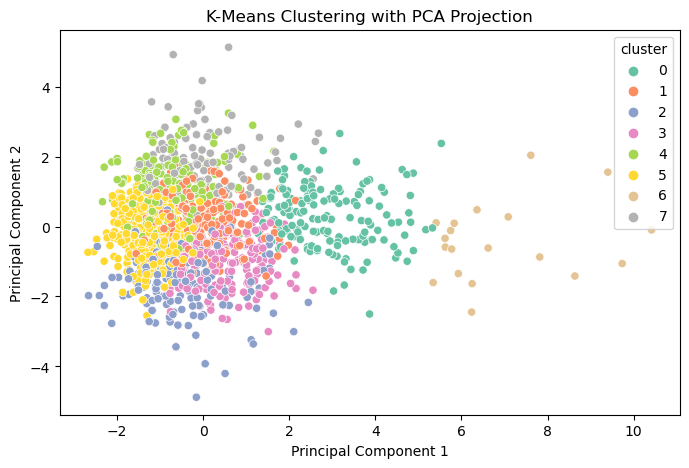

In [ ]:
#using PCA to help graph all 8 clusters and data values

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
spotify["PC1"] = pca_components[:, 0]
spotify["PC2"] = pca_components[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=spotify, x="PC1", y="PC2", hue="cluster", palette="Set2")
plt.title("K-Means Clustering with PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The plot shows how a lot of the clusters are close together, while cluster 7 seems to be much farther away from the other groups. This could mean specific outliers in the dataset, or it could be the fact that there were so many clusters it was hard to differentiate the values. We will now look at individual variables and its k-means to track popularity. We are focusing on energy, speechiness, acousticness, and duration.  

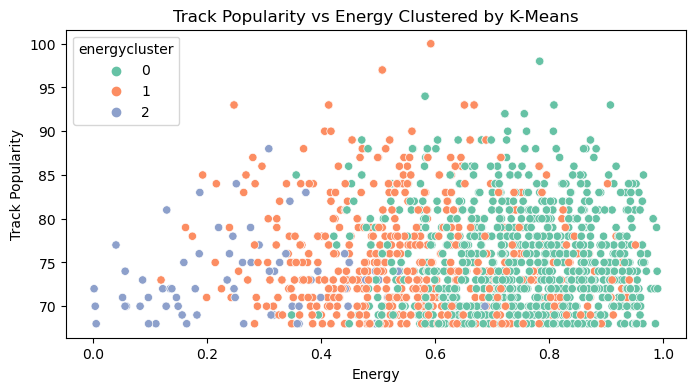

In [ ]:
#k-means with just energy
data = spotify[["energy"]]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
spotify["energycluster"] = kmeans.fit_predict(energy_data)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=spotify, x="energy", y="track_popularity", hue="energycluster", palette="Set2")
plt.title("Track Popularity vs Energy Clustered by K-Means")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.show()

The clusters are a bit more separate here, but cluster 0 and 1 are quite mixed together. This may show that energy is not a determining factor of track popularity. 

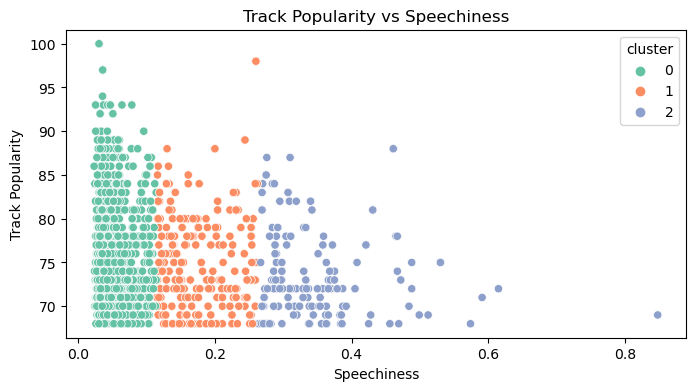

In [ ]:
#k-means with speechiness

data = spotify[["speechiness"]]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
spotify["cluster"] = kmeans.fit_predict(data)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=spotify, x="speechiness", y="track_popularity", hue="cluster", palette="Set2")
plt.title("Track Popularity vs Speechiness")
plt.xlabel("Speechiness")
plt.ylabel("Track Popularity")
plt.show()

The clusters here are a lot more distinct, but the data points themselves are still pretty close together. With that, the graph does tend to show that songs with less speechiness do tend to be more popular. 

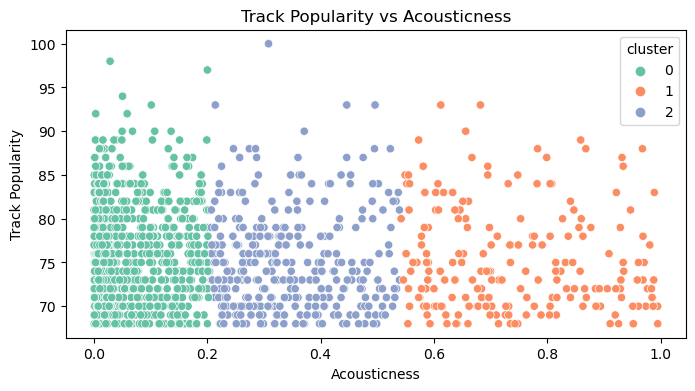

In [ ]:
#k-means with acousticness

data = spotify[["acousticness"]]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
spotify["cluster"] = kmeans.fit_predict(data)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=spotify, x="acousticness", y="track_popularity", hue="cluster", palette="Set2")
plt.title("Track Popularity vs Acousticness")
plt.xlabel("Acousticness")
plt.ylabel("Track Popularity")
plt.show()

With acousticness, it is still a bit more clustered together, but not as much as the previous plot. This graph seems to show that the level of acousticness of a song typically does not have much to do with track popularity. 

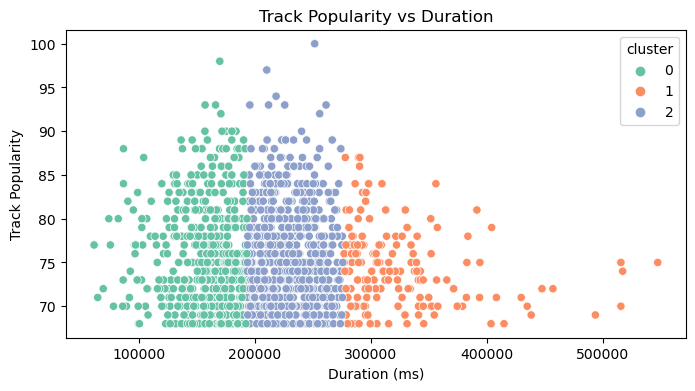

In [ ]:
#k-means with duration

data = spotify[["duration_ms"]]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
spotify["cluster"] = kmeans.fit_predict(data)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=spotify, x="duration_ms", y="track_popularity", hue="cluster", palette="Set2")
plt.title("Track Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Track Popularity")
plt.show()

The graph here shows that songs with longer durations tend to be less popular. The clusters are a bit grouped together, but it is easy to differentiate each cluster and there does not seem to be much overlap as well. 

## Conclusion

The main goal of this project was to determine if specific audio features would increase the popularity of a song. We decided to look into k-means clustering to see if we could visualize any correlational patterns that would not have been picked up by linear regression or other machine learning techniques. The main aspects we focused on were speechiness, acousticness, and duration since they had a slight linear correlation as shown in the previous project. I do believe the k-means gave us some information, as the plot for track popularity vs speechiness did show how less speechy songs have a correlation with being more popular, and that most of these audio features end up having similar average values. I believe these methods help further understand the data rather than just giving a straight answer on what features affect track popularity. I still believe we can further look into a method to determine this, but it might require more complex machine learning techniques than what we already used. 

## Works Cited

dataset from: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset